In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
path='D:\data analysis\Kaggle\HomeCreditDefaultRisk\input' ##..表示py文件上一层的所有路径
print(os.listdir(path))

['.idea', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HCDF.ipynb', 'HCDF.py', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [5]:
application_test = pd.read_csv(path+'\\'+'application_test.csv')
application_train = pd.read_csv(path+'\\'+'application_train.csv')
bureau = pd.read_csv(path+'\\'+'bureau.csv')
bureau_balance = pd.read_csv(path+'\\'+'bureau_balance.csv')
credit_card_balance = pd.read_csv(path+'\\'+'credit_card_balance.csv')
installments_payments = pd.read_csv(path+'\\'+'installments_payments.csv')
POS_CASH_balance = pd.read_csv(path+'\\'+'POS_CASH_balance.csv')
previous_application = pd.read_csv(path+'\\'+'previous_application.csv')
sample_submission = pd.read_csv(path+'\\'+'sample_submission.csv')

In [6]:
print('application_test -- row',application_test.shape[0],' columns',application_test.shape[1])
print('application_train -- row',application_train.shape[0],' columns',application_train.shape[1])
print("bureau -- rows:",bureau.shape[0]," columns:", bureau.shape[1])
print("bureau_balance -  rows:",bureau_balance.shape[0]," columns:", bureau_balance.shape[1])
print("credit_card_balance -  rows:",credit_card_balance.shape[0]," columns:", credit_card_balance.shape[1])
print("installments_payments -  rows:",installments_payments.shape[0]," columns:", installments_payments.shape[1])
print("previous_application -  rows:",previous_application.shape[0]," columns:", previous_application.shape[1])
print("POS_CASH_balance -  rows:",POS_CASH_balance.shape[0]," columns:", POS_CASH_balance.shape[1])

application_test -- row

 48744  columns 121
application_train -- row 307511  columns 122
bureau -- rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8


In [8]:
#application_test
print(application_train.head())
#application_train = pd.DataFrame(application_train)
print(application_train.columns.values)
#application_train
print(application_test.head())
print(application_test.columns.values)
#bureau
print(bureau.head())
print(bureau.columns.values)
#bureau_balance
print(bureau_balance.head())
print(bureau_balance.columns.values)
#credit_card_balance
print(credit_card_balance.head())
print(credit_card_balance.columns.values)
#installments_payments
print(installments_payments.head())
print(installments_payments.columns.values)
#previous_application
print(previous_application.head())
print(previous_application.columns.values)
#POS_CASH_balance
print(POS_CASH_balance.head())
print(POS_CASH_balance.columns.values)

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0 

In [9]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)##ascending 排序方式，默认为True是为降序，False 为升序
    ##sort_value 根据某一列的数值进行排序，NaN值会自动排在最后面
    percent = (data.isnull().sum() / data.isnull().count() *100).sort_values(ascending = False)
    return pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [10]:
missing_data(application_train).head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [11]:
missing_data(application_test).head(10)

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
NONLIVINGAPARTMENTS_AVG,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302


In [12]:
missing_data(bureau)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_TYPE,0,0.000000
AMT_CREDIT_SUM_OVERDUE,0,0.000000
CNT_CREDIT_PROLONG,0,0.000000


In [13]:
missing_data(bureau_balance)

,Total,Percent
STATUS,0,0.0
MONTHS_BALANCE,0,0.0
SK_ID_BUREAU,0,0.0


In [14]:
missing_data(credit_card_balance)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_DPD_DEF,0,0.000000


In [15]:
missing_data(installments_payments)

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_INSTALMENT,0,0.000000
DAYS_INSTALMENT,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


In [16]:
missing_data(previous_application).head(20)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


In [17]:
missing_data(POS_CASH_balance)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
MONTHS_BALANCE,0,0.000000
SK_ID_CURR,0,0.000000
SK_ID_PREV,0,0.000000


In [18]:
missing_data(sample_submission).head(10)

,Total,Percent
TARGET,0,0.0
SK_ID_CURR,0,0.0


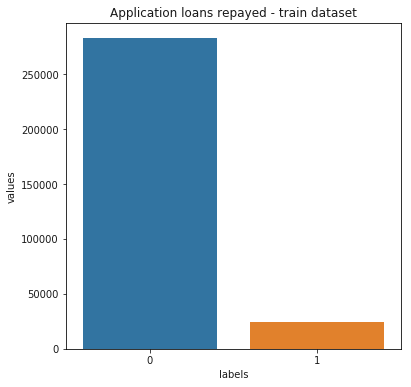

In [19]:
###Target  vlaue 0 means loan is repayed vlaue 1 means loan is not repayed
tmp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels':tmp.index,
                   'values':tmp.values})
plt.figure(figsize= (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y = 'values', data= df)
locs, labels = plt.xticks()
plt.show()

In [20]:
def plot_stats(feature,lable_rotation= False,horizontal_layout = True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature:temp.index,
                        "Number of contracts":temp.values})
    ##计算 每个目录中 target =1 的百分比
    cat_perc = application_train[[feature,'TARGET']].groupby([feature],as_index=False).mean()#groupby之后的数据并不是DataFrame格式的数据，
    # 而是特殊的groupby类型，此时，可以通过size()方法返回分组后的记录数目统计结果，该结果是Series类型
    cat_perc.sort_values(by='TARGET',ascending=False,inplace=True)

    if (horizontal_layout):
        fig,(ax1,ax2) = plt.subplots(ncols =2,figsize = (12,6))
    else:
        fig,(ax1,ax2) = plt.subplots(nrows = 2, figsize = (12,14))
    sns.set_color_codes("pastel")
        
    s = sns.barplot(ax=ax1,x =feature,y="Number of contracts",data =df1)
    if (lable_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax =ax2, x= feature,y ='TARGET',order = cat_perc[feature],data=cat_perc)
    if (lable_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation = 90)
    plt.ylabel('Percenta of target with value 1 [%]',fontsize=10)
    plt.tick_params(axis='both',which='major',labelsize =10)

    plt.show()

In [21]:
def plot_distribution(var):

    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

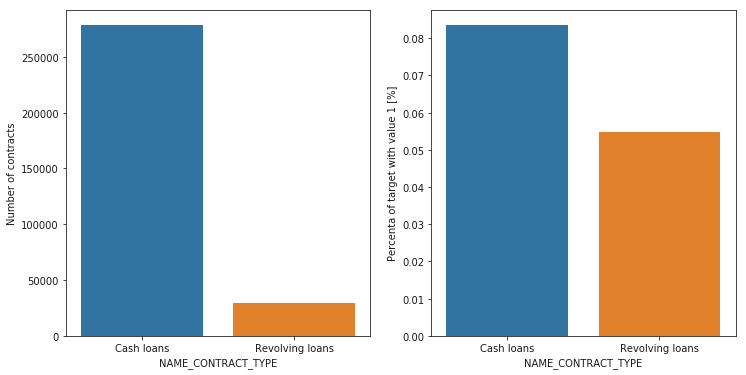

In [22]:
plot_stats('NAME_CONTRACT_TYPE')

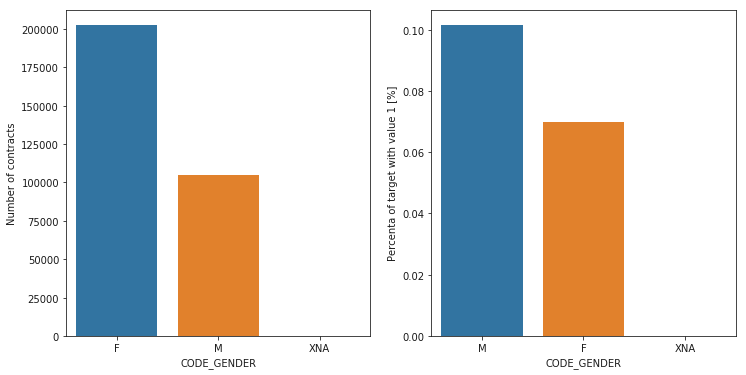

In [23]:
plot_stats('CODE_GENDER')

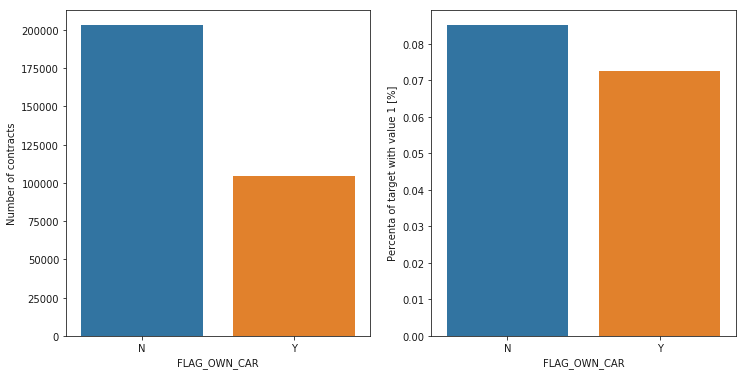

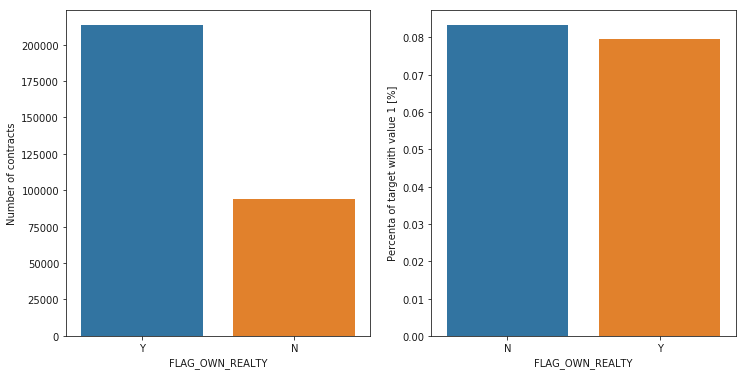

In [25]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

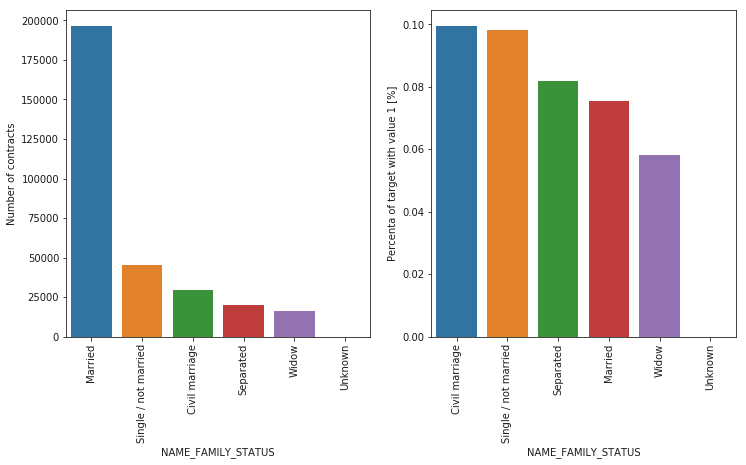

In [26]:
plot_stats('NAME_FAMILY_STATUS',True,True)

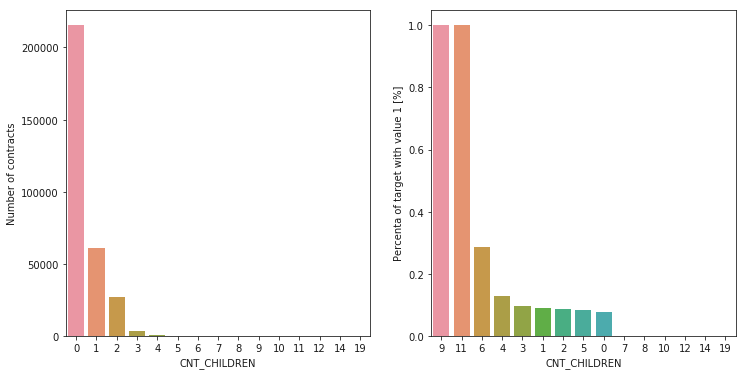

In [27]:
plot_stats('CNT_CHILDREN')

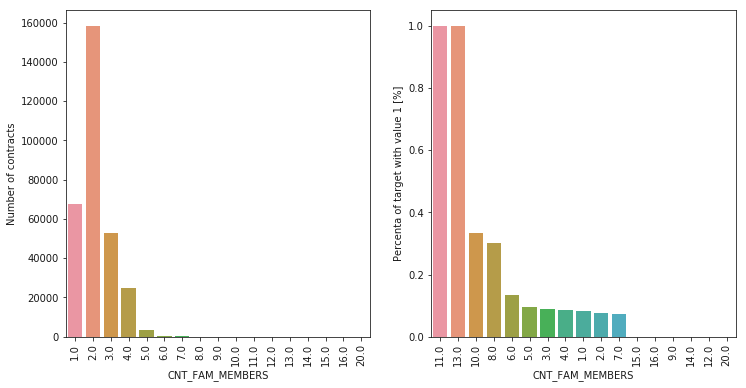

In [28]:
plot_stats('CNT_FAM_MEMBERS',True)

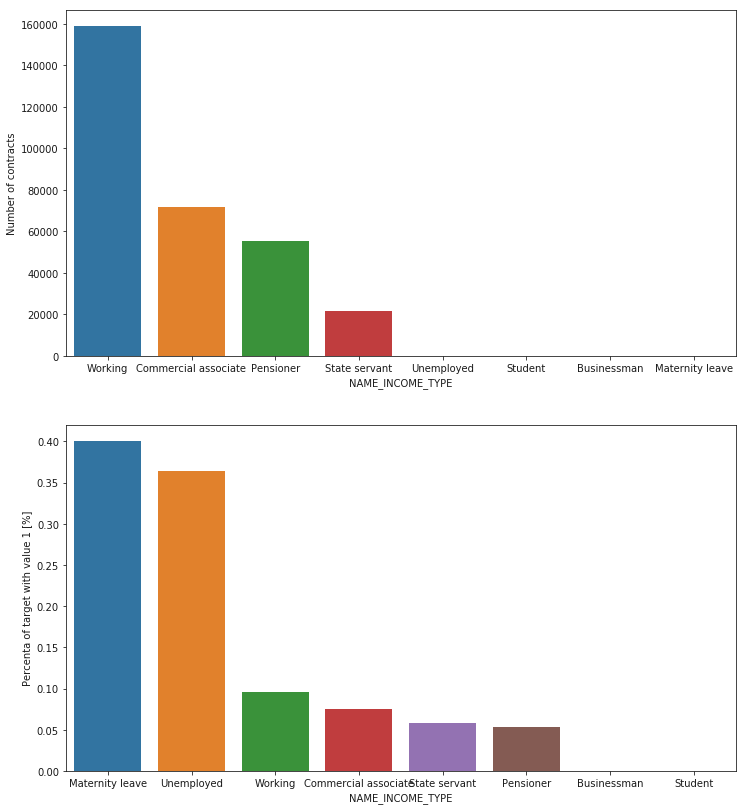

In [29]:
plot_stats('NAME_INCOME_TYPE',False,False)

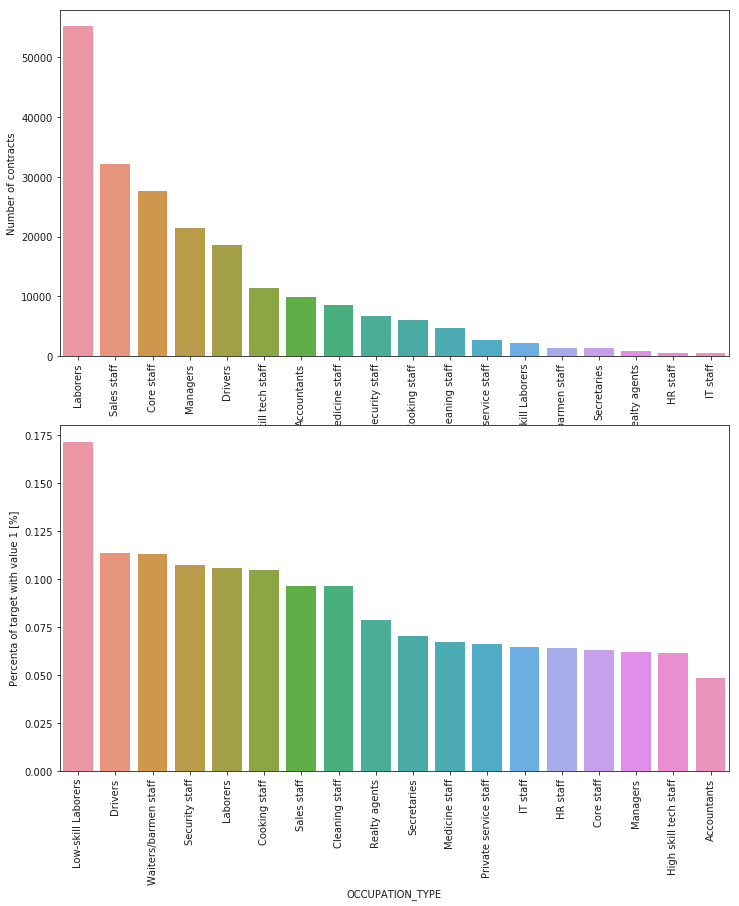

In [33]:
plot_stats('OCCUPATION_TYPE',True,False)

In [35]:
plot_stats('ORGANIZATION_TYPE',True,False)

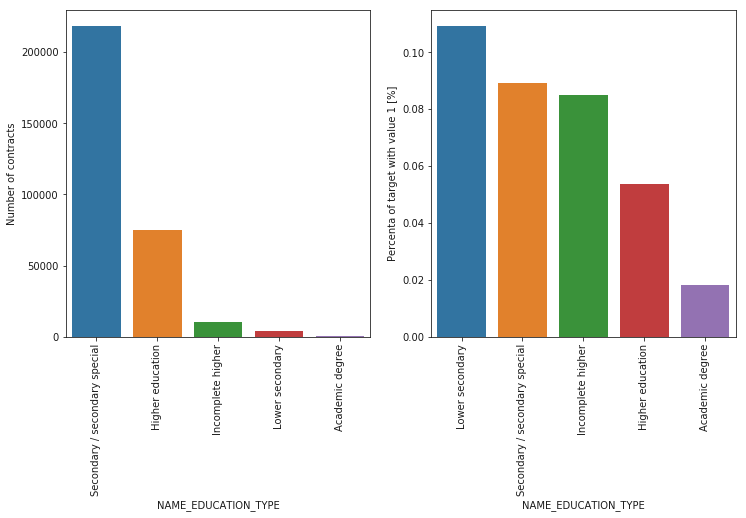

In [36]:
plot_stats('NAME_EDUCATION_TYPE',True)

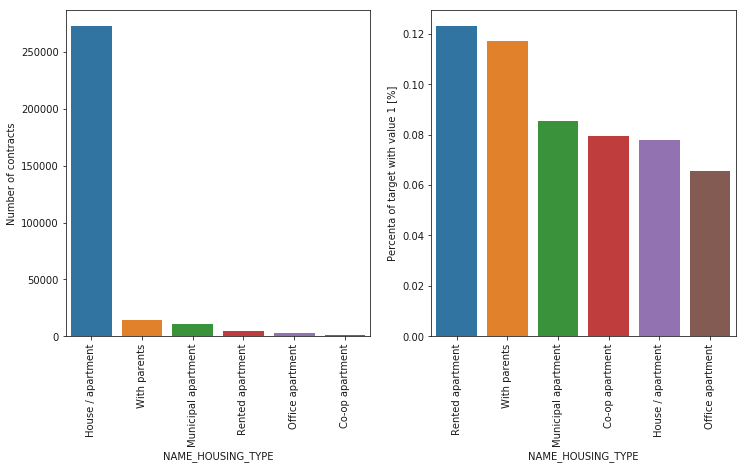

In [37]:
plot_stats('NAME_HOUSING_TYPE',True)

In [38]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()  

In [39]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

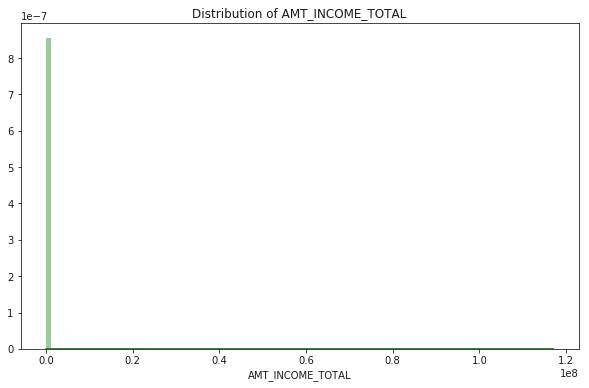

In [40]:
plot_distribution('AMT_INCOME_TOTAL','green')

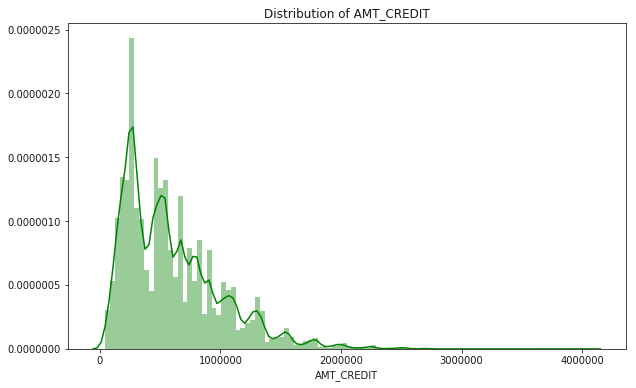

In [41]:
plot_distribution('AMT_CREDIT','green')

In [1]:
plot_distribution('AMT_ANNUITY','red')

NameError: name 'plot_distribution' is not defined

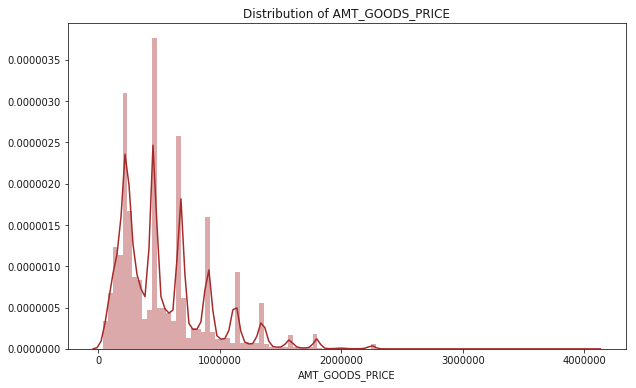

In [43]:
plot_distribution('AMT_GOODS_PRICE','brown')

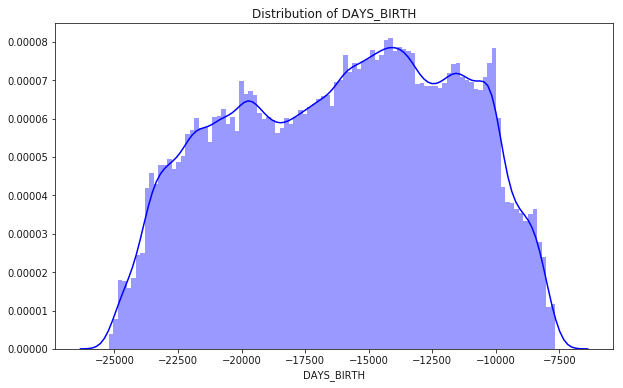

In [44]:
plot_distribution('DAYS_BIRTH','blue')

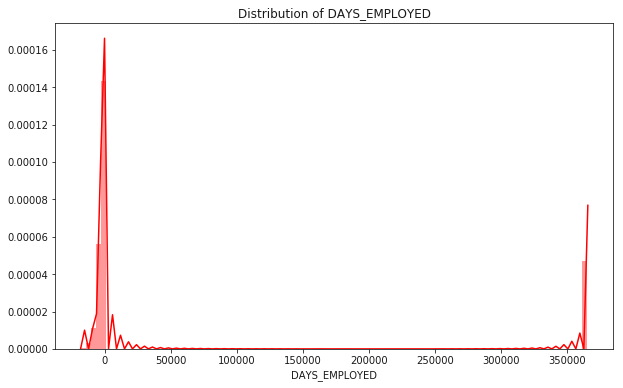

In [45]:
plot_distribution('DAYS_EMPLOYED','red')

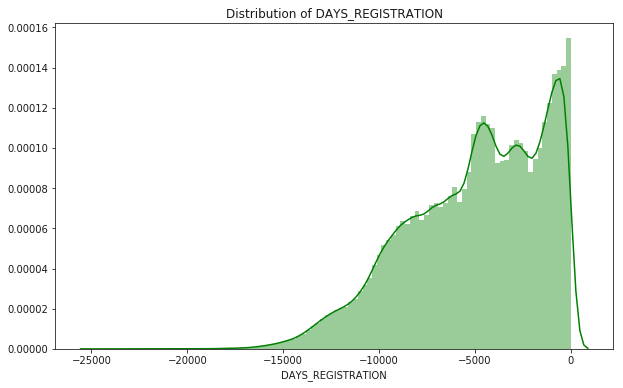

In [46]:
plot_distribution('DAYS_REGISTRATION','green')

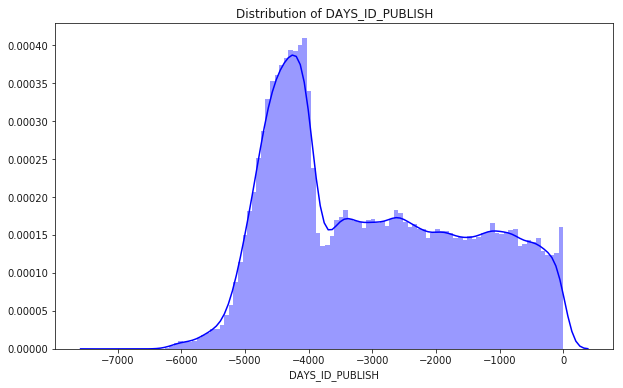

In [47]:
plot_distribution('DAYS_ID_PUBLISH','blue')

In [51]:
#Let's compare the distribution of interval values ploted above for values of TARGET = 1 and TARGET = 0
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']
plot_distribution_comp(var,nrow=3)

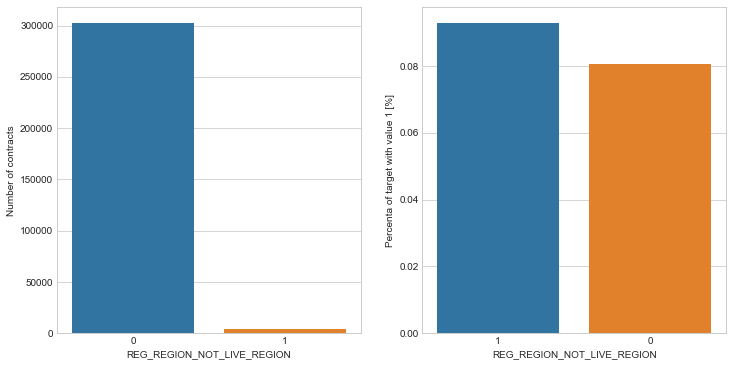

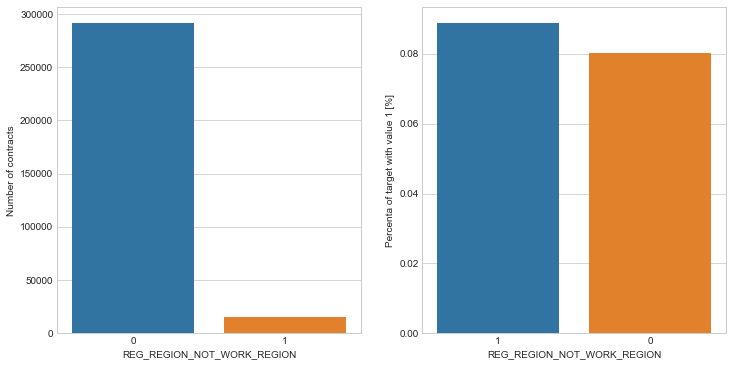

In [52]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

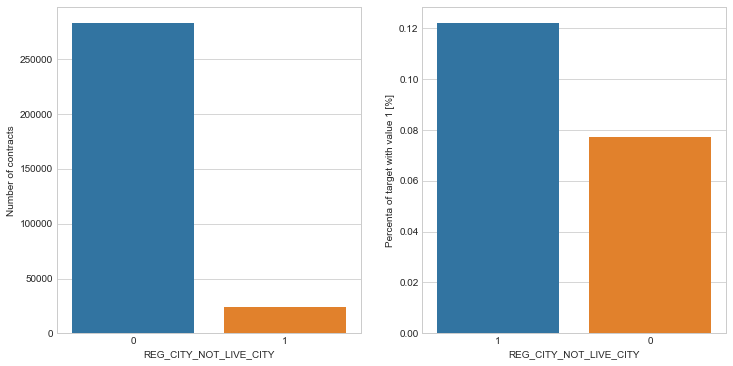

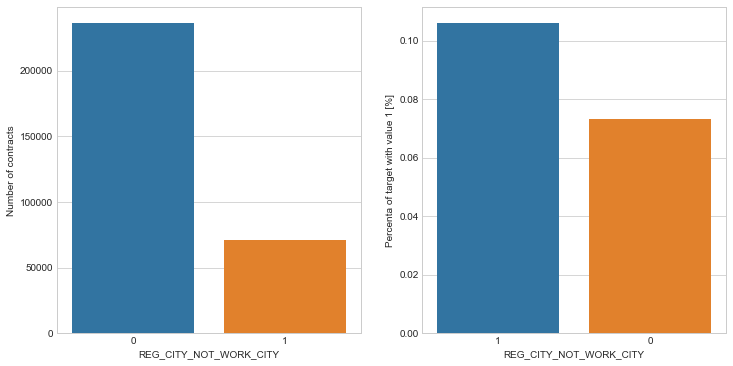

In [53]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

In [62]:
application_bureau_train = application_train.merge(bureau, on='SK_ID_CURR', how='inner')

In [63]:
print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
      application_bureau_train.shape[1]," columns.")

The resulting dataframe `application_bureau_train` has  1465325  rows and  138  columns.


In [58]:
def plot_b_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_bureau_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_bureau_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

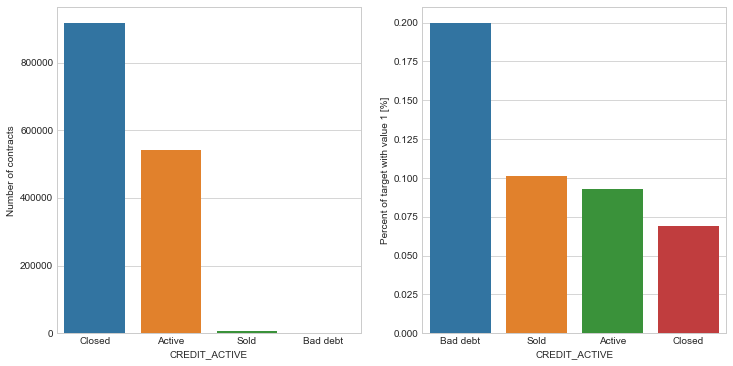

In [65]:
plot_b_stats('CREDIT_ACTIVE')

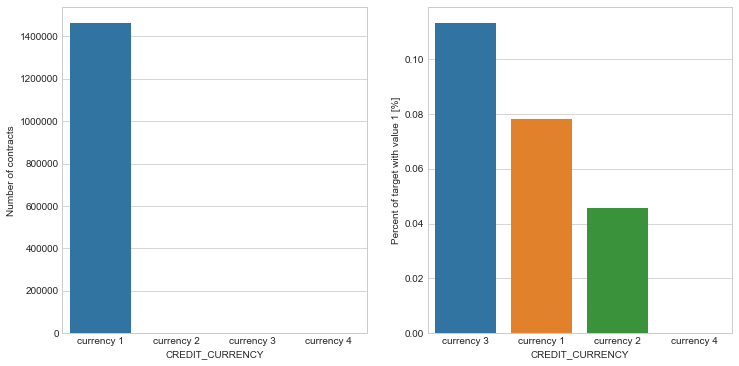

In [67]:
plot_b_stats('CREDIT_CURRENCY')

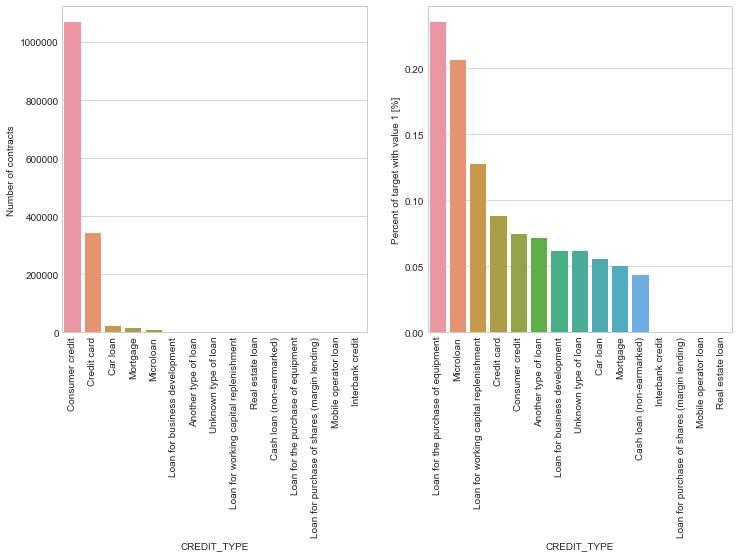

In [68]:
plot_b_stats('CREDIT_TYPE', True, True)

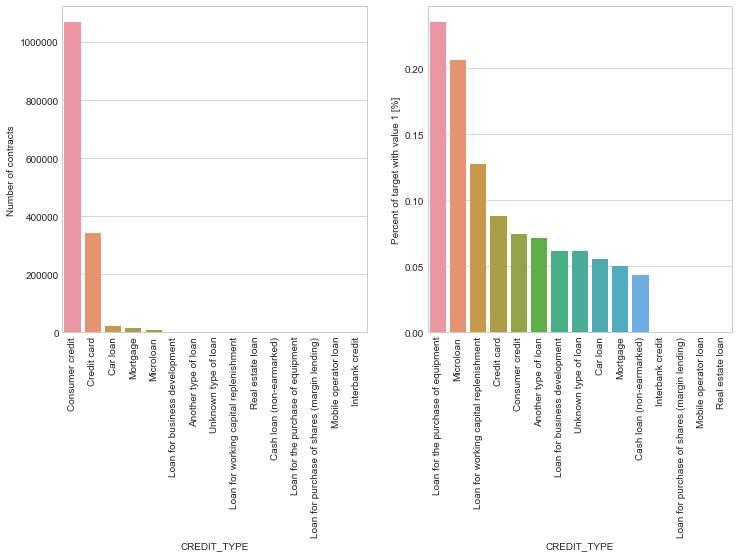

In [70]:
plot_b_stats('CREDIT_TYPE', True, True)

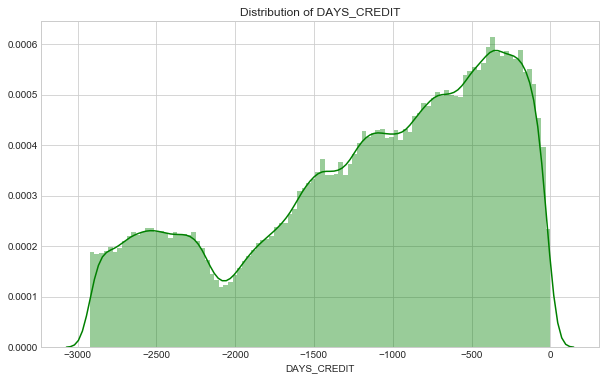

In [71]:
def plot_b_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_bureau_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 
    
plot_b_distribution('DAYS_CREDIT','green')

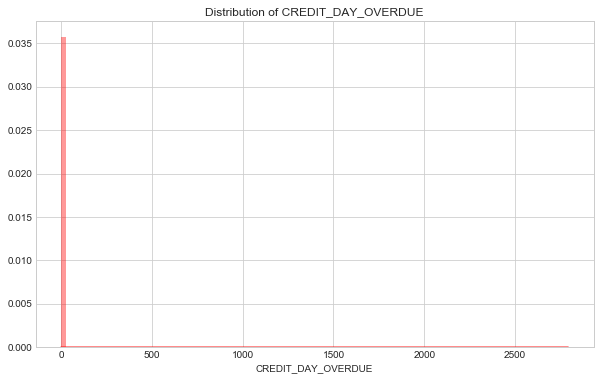

In [72]:
plot_b_distribution('CREDIT_DAY_OVERDUE','red')

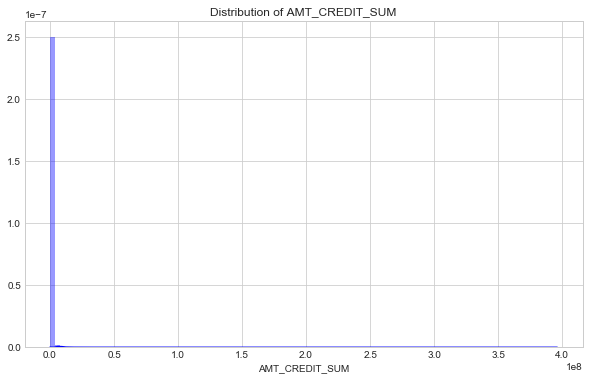

In [73]:
plot_b_distribution('AMT_CREDIT_SUM','blue')

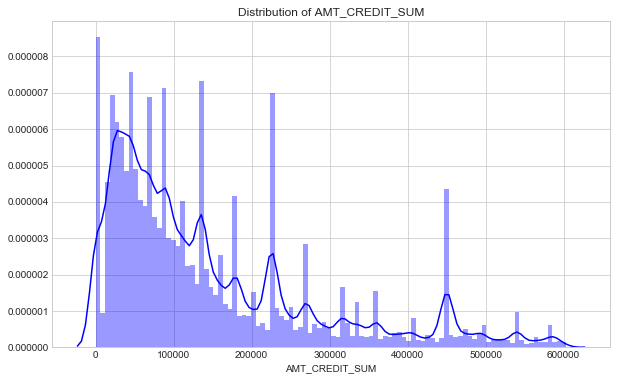

In [82]:
# Source: https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting (see references)

def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def plot_b_o_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    x = application_bureau_train[feature].dropna()
    filtered = x[~is_outlier(x)]
    sns.distplot(filtered,color=color, kde=True,bins=100)
    plt.show() 

plot_b_o_distribution('AMT_CREDIT_SUM','blue')

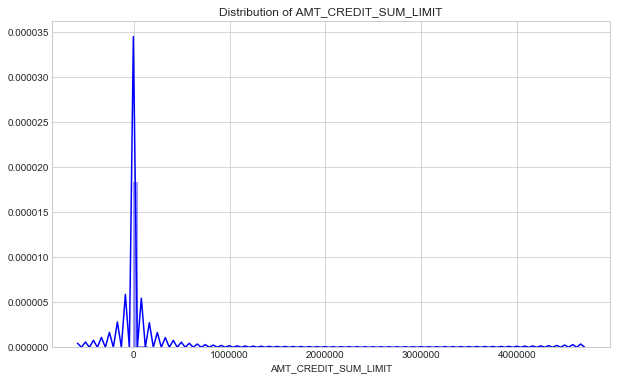

In [83]:
plot_b_distribution('AMT_CREDIT_SUM_LIMIT','blue')

In [84]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_b_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_bureau_train.loc[application_bureau_train['TARGET'] != 0]
    t0 = application_bureau_train.loc[application_bureau_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

In [87]:
var = ['DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT']
plot_b_distribution_comp(var, nrow=2)

In [88]:
application_prev_train = application_train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')                                                   

In [89]:
print("The resulting dataframe `application_prev_train` has ",application_prev_train.shape[0]," rows and ", 
      application_prev_train.shape[1]," columns.")

The resulting dataframe `application_prev_train` has  1413701  rows and  158  columns.


In [90]:
def plot_p_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_prev_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_prev_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

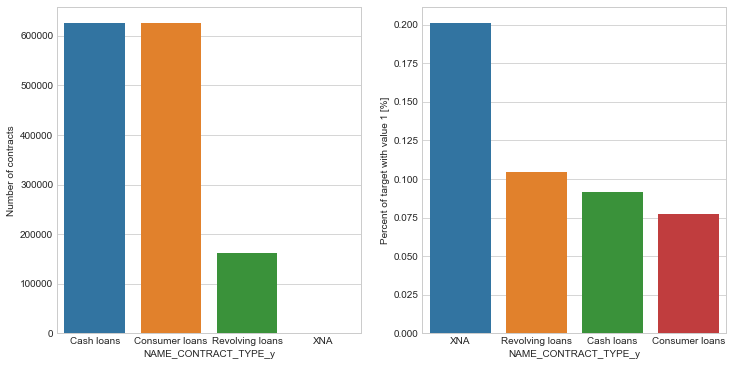

In [92]:
plot_p_stats('NAME_CONTRACT_TYPE_y')

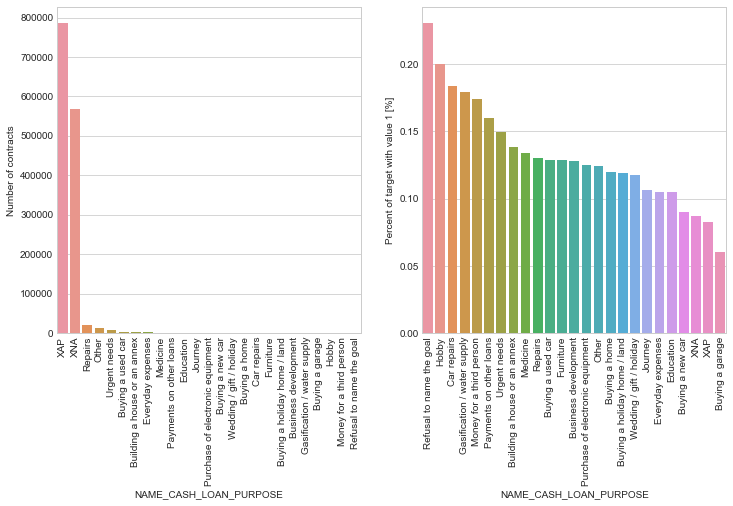

In [93]:
plot_p_stats('NAME_CASH_LOAN_PURPOSE', True, True)

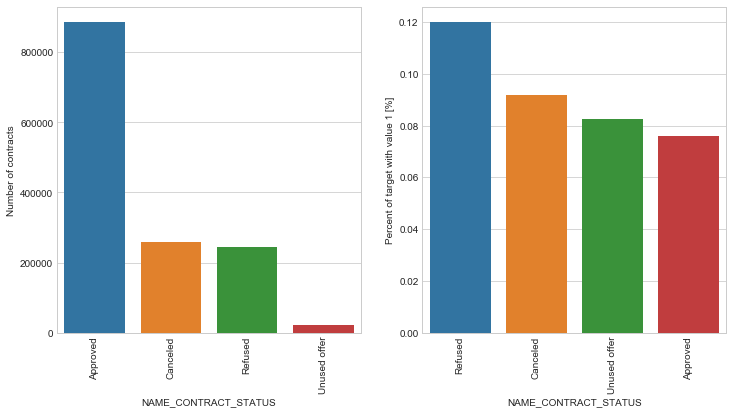

In [94]:
plot_p_stats('NAME_CONTRACT_STATUS', True, True)

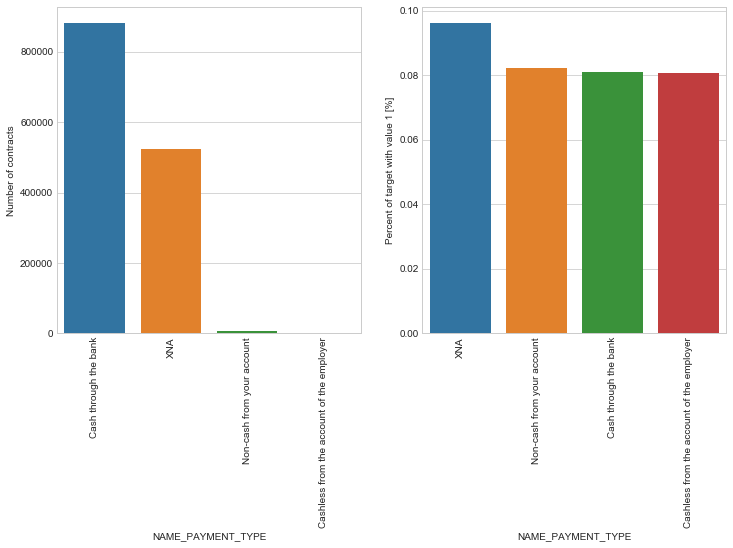

In [95]:
plot_p_stats('NAME_PAYMENT_TYPE', True, True)

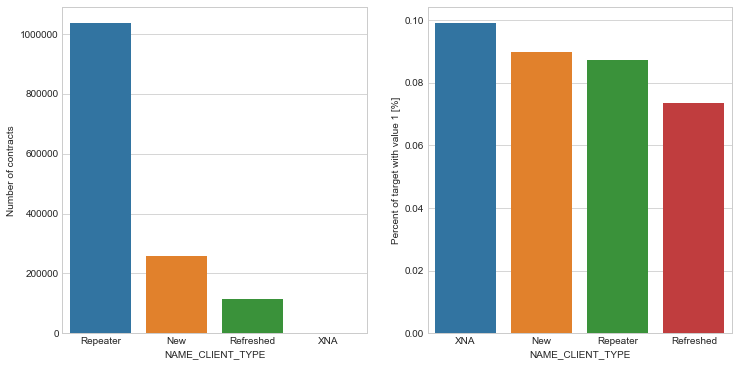

In [99]:
plot_p_stats('NAME_CLIENT_TYPE')